# NLP Classification CleanWatAI Project
This notebook classifies water safety reports using structured data and natural language processing (NLP) from the "excerpt" field.

---

In [54]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


##  **Data Loading and Exploratory Data Analysis (EDA)**
To begin our NLP project, we first loaded the dataset which contains humanitarian assessment reports, each associated with a severity label. Our aim is to predict the severity of humanitarian issues based on the textual content of these reports.

**Key Steps in Data Loading:**
Loaded the dataset using Pandas.

Displayed basic information: column names, data types, and sample records.

Verified the presence of essential columns for NLP and modeling:

excerpt: the main text field describing events.

severity: the target label, with categories like "Unsafe", "Safe" and "Moderate".

Checked for null or missing values in the key columns.
### **Data Loading**

In [55]:
# Importing libraries

import numpy as np
import pandas as pd

In [56]:
# Load the data
df = pd.read_csv(r'C:\Users\USER\Documents\Flatiron\Capstone Project\CleanWatAI\data\raw\water_sanitation.csv')
df.head()

entry_id   country  \
0  81a69ab1-6070-4643-ab31-062dabbe355d     Haiti   
1  e4774c0e-38ca-48bc-a62d-56ad7dc2ebf1  Ethiopia   
2  ed103eee-2e27-4be4-b6fe-59e1b095a507     Nepal   
3  4d8e529d-08cd-428b-b4a8-e4c4cbadeb33     India   
4  8396148f-36a8-4ee9-af7f-653b8d06aa9c     Kenya   

                                        source_title  \
0                      Skill may certainly off sing.   
1                        Cup movie than fund artist.   
2  Note Congress day million everybody environmen...   
3                             Summer today southern.   
4                 Region sea nation fast shake born.   

                                             excerpt  geo_location  \
0  Health inspectors on site found that improper ...      5.937200   
1  The latest sanitation review indicated that im...     34.615215   
2  According to recent field observations, waste ...    -68.387244   
3  The latest sanitation review indicated that ef...    -71.814776   
4  A comprehensive report issued by the agency no...    -10.132914   

     water_source    sanitation_type                 sector  gender age_group  \
0           River    Open Defecation                 Health  Female     Youth   
1        Borehole  Composting Toilet  Public Infrastructure    Male     Youth   
2  Truck Delivery        Pit Latrine                 Health  Female     Adult   
3       Rainwater  Composting Toilet              Education    Male   Elderly   
4        Borehole  Composting Toilet  Public Infrastructure  Female     Youth   

   ... water_color water_clarity water_odor recent_rain  nearby_activities  \
0  ...       clear         clear   chemical          no            farming   
1  ...       murky        turbid     sewage         yes            farming   
2  ...       green         clear     sewage          no             mining   
3  ...       brown        turbid     sewage          no             mining   
4  ...       murky        cloudy       none          no               none   

  nearby_infrastructure vegetation_near_source waste_disposal_nearby  \
0      waste facilities                   lush         managed sites   
1      waste facilities                 sparse                  none   
2      waste facilities                   dead         managed sites   
3          sewage lines                   dead         managed sites   
4      waste facilities                   lush          open dumping   

  animal_access water_flow_rate  
0            no            slow  
1           yes        stagnant  
2           yes         flowing  
3           yes            slow  
4            no        stagnant  

[5 rows x 29 columns]

### **Data Exploration**

In [57]:
df['country'].unique()  # or whichever column you suspect


array(['Haiti', 'Ethiopia', 'Nepal', 'India', 'Kenya', 'Nigeria',
       'Bangladesh', 'DR Congo', 'Uganda', 'Somalia'], dtype=object)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4157 entries, 0 to 4156
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   entry_id                4157 non-null   object 
 1   country                 4157 non-null   object 
 2   source_title            4157 non-null   object 
 3   excerpt                 4157 non-null   object 
 4   geo_location            4157 non-null   float64
 5   water_source            4157 non-null   object 
 6   sanitation_type         4157 non-null   object 
 7   sector                  4157 non-null   object 
 8   gender                  4157 non-null   object 
 9   age_group               4157 non-null   object 
 10  income_level            4157 non-null   object 
 11  infrastructure_type     4157 non-null   object 
 12  population_density      4157 non-null   object 
 13  climate_zone            4157 non-null   object 
 14  year                    4157 non-null   

In [59]:
df.columns

Index(['entry_id', 'country', 'source_title', 'excerpt', 'geo_location',
       'water_source', 'sanitation_type', 'sector', 'gender', 'age_group',
       'income_level', 'infrastructure_type', 'population_density',
       'climate_zone', 'year', 'organization', 'source_type',
       'special_needs_group', 'severity', 'water_color', 'water_clarity',
       'water_odor', 'recent_rain', 'nearby_activities',
       'nearby_infrastructure', 'vegetation_near_source',
       'waste_disposal_nearby', 'animal_access', 'water_flow_rate'],
      dtype='object')

In [60]:
df['excerpt'][10]

'Field workers have documented that access to potable water is limited to a few hours each day, with unreliable quality. Local authorities are urged to scale up hygiene education campaigns.'

### **Data Cleaning**

In [61]:
# Checking for missing/null values
for col in  df.columns:
    if df[col].isna().sum() > 0:
        print(f'{col} : {df[col].isna().sum()}')

special_needs_group : 779


- From the above cell only **'special_needs_group'** column contains 779 missing / null-values

In [62]:
df['special_needs_group'].value_counts()

special_needs_group
Children Under 5    891
Elderly             834
Disabled            831
Pregnant Women      822
Name: count, dtype: int64

In [63]:
# Replace missing with 'none' instead of having 'None' which reads as Null-Value
df['special_needs_group'] = df['special_needs_group'].fillna('none')
df['special_needs_group'].value_counts()

special_needs_group
Children Under 5    891
Elderly             834
Disabled            831
Pregnant Women      822
none                779
Name: count, dtype: int64

### Duplicates

In [64]:
# Checking for duplicated entries
df.duplicated().sum()

np.int64(1157)

In [65]:
df = df.drop_duplicates()
print(f'Duplicated entries : {df.duplicated().sum()}')

Duplicated entries : 0


In [66]:
df.to_csv(r'C:\Users\USER\Documents\Flatiron\Capstone Project\CleanWatAI\data\processed\water_sanitation_clean.csv')

In [67]:
# Library importation
import seaborn as sns
import matplotlib.pyplot as plt

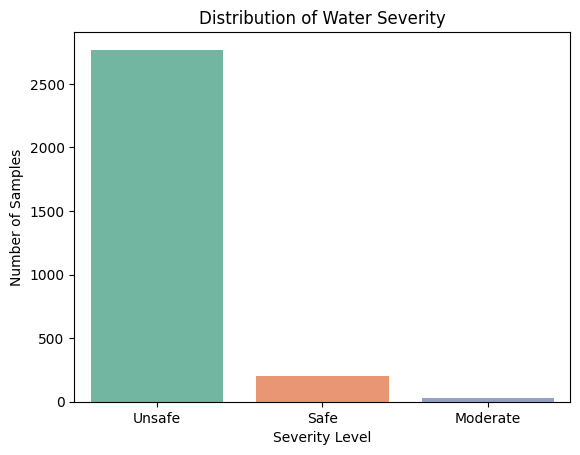

In [68]:
# Target variable distribution
# Count of each severity class
sns.countplot(data=df, x='severity', hue='severity', palette='Set2', legend=False)
plt.title('Distribution of Water Severity')
plt.xlabel('Severity Level')
plt.ylabel('Number of Samples')
plt.show()


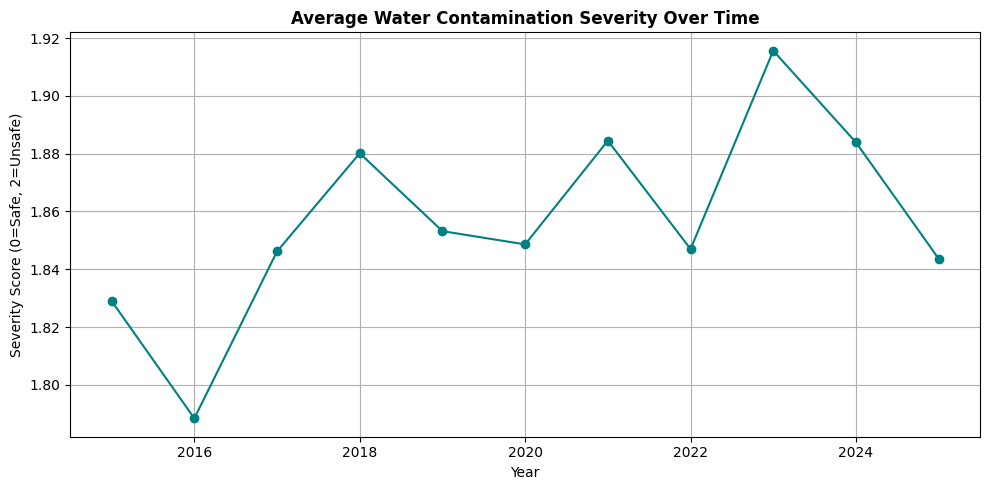

In [69]:
severity_map = {
    'Safe': 0,
    'Moderate': 1,
    'Unsafe': 2
}

# Create a numeric severity column
df['severity_score'] = df['severity'].map(severity_map)

# Now you can group and plot the mean severity
fig, ax = plt.subplots(figsize=(10, 5))
df.groupby('year')['severity_score'].mean().plot(ax=ax, color='teal', marker='o')

ax.set_title('Average Water Contamination Severity Over Time', weight='bold')
ax.set_xlabel('Year')
ax.set_ylabel('Severity Score (0=Safe, 2=Unsafe)')
plt.grid(True)
plt.tight_layout()
plt.show()



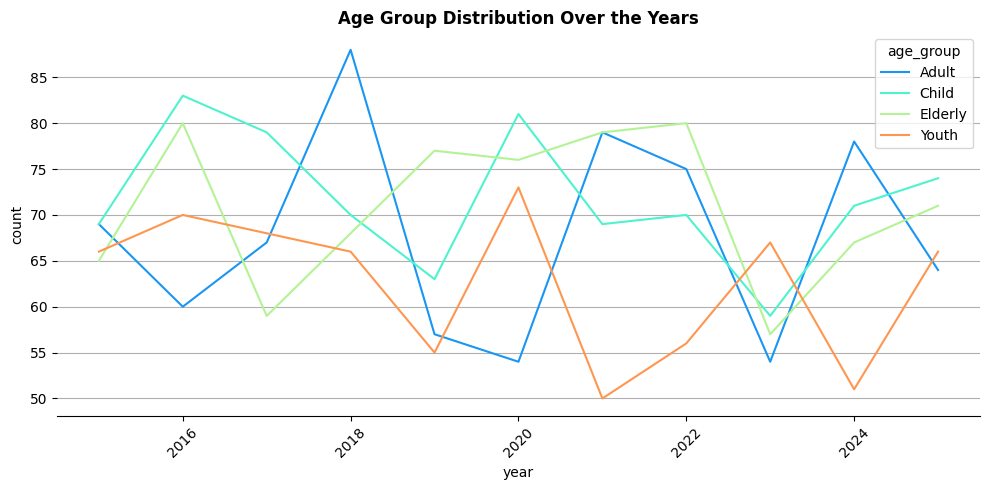

In [70]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.lineplot(data=df.groupby(['year', 'age_group']).size().reset_index(name='count'),
             x='year', y='count', hue='age_group', palette='rainbow', ax=ax)

ax.set_title('Age Group Distribution Over the Years', weight='bold')
ax.grid(axis='y')
ax.spines[['top', 'right', 'left']].set_visible(False)
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [71]:

from geopy.geocoders import Nominatim
import time

# Initialize geolocator
geolocator = Nominatim(user_agent="geo_cleanwater")

# Define a function to get coordinates
def get_coordinates(country_name):
    try:
        location = geolocator.geocode(country_name, timeout=10)
        if location:
            return pd.Series([location.latitude, location.longitude])
        else:
            return pd.Series([None, None])
    except Exception as e:
        print(f"Error geocoding {country_name}: {e}")
        return pd.Series([None, None])

unique_countries = df['country'].dropna().unique()

# Create a list of country, lat, lon
coord_data = []
for country in unique_countries:
    lat_lon = get_coordinates(country)
    coord_data.append({'country': country, 'latitude': lat_lon[0], 'longitude': lat_lon[1]})
    time.sleep(1)

coord_df = pd.DataFrame(coord_data)

# Show a few rows of the coordinate DataFrame
print(coord_df.head())

# Merge into original DataFrame
df = pd.merge(df, coord_df, on='country', how='left')

# Show a sample of country + coordinates
print(df[['country', 'latitude', 'longitude']].dropna().head())


    country   latitude  longitude
0     Haiti  19.139995 -72.357097
1  Ethiopia  10.211670  38.652120
2     Nepal  28.378046  83.999990
3     India  22.351115  78.667743
4     Kenya   1.441968  38.431398
    country   latitude  longitude
0     Haiti  19.139995 -72.357097
1  Ethiopia  10.211670  38.652120
2     Nepal  28.378046  83.999990
3     India  22.351115  78.667743
4     Kenya   1.441968  38.431398


In [72]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

# Initialize geolocator
geolocator = Nominatim(user_agent="cleanwater_mapper")
geocode = RateLimiter(geolocator.reverse, min_delay_seconds=1)

# Function to get location details
def get_full_location(lat, lon):
    try:
        location = geolocator.reverse((lat, lon), language='en', exactly_one=True, timeout=10)
        if location and 'address' in location.raw:
            return location.raw['address']
        return pd.Series({
                'country_name': address.get('country', None),
                'state': address.get('state', None),
                'county': address.get('county', address.get('suburb', None))
            })
    except Exception as e:
        print(f"Error at ({lat}, {lon}): {e}")
    
    except:
        return pd.Series({'country_name': None, 'state': None, 'county': None})


In [73]:
geolocator = Nominatim(user_agent="global_water_safety_mapper")
geocode = RateLimiter(geolocator.reverse, min_delay_seconds=1)

# Extracting area info
def get_area(lat, lon):
    try:
        location = geolocator.reverse((lat, lon), language='en', exactly_one=True, timeout=10)
        if location and 'address' in location.raw:
            address = location.raw['address']
            return (
                address.get('city_district') or
                address.get('county') or
                address.get('suburb') or
                address.get('town') or
                address.get('village') or
                address.get('state_district') or
                address.get('state') or
                address.get('region') or
                address.get('municipality') or
                address.get('country')
            )
        return None
    except Exception as e:
        print(f"Failed at ({lat}, {lon}) → {e}")
        return None

sample_df = df[['latitude', 'longitude']].dropna().sample(100, random_state=1)
location_info = sample_df.apply(lambda row: get_full_location(row['latitude'], row['longitude']), axis=1)

# Combine back to original sample
sample_df = sample_df.reset_index(drop=True)
location_info = location_info.reset_index(drop=True)
enriched_sample = pd.concat([sample_df, location_info], axis=1)

# Display
print(enriched_sample.head())


    latitude  longitude                                                  0
0   9.600036   7.999972  {'city': 'Kurmin Musa', 'county': 'Kachia', 's...
1  19.139995 -72.357097  {'suburb': '5ème Fiéfé', 'city': 'Commune de D...
2  28.378046  83.999990  {'city_district': 'Machhapuchchhre-01', 'munic...
3   1.441968  38.431398  {'county': 'Merti', 'state': 'Isiolo', 'ISO316...
4  10.211670  38.652120  {'town': 'Gundo Meskel', 'state_district': 'No...


In [74]:
import folium
from folium.plugins import MarkerCluster

# Function to choose marker color based on severity
def get_marker_color(severity):
    if severity == 'Safe':
        return 'green'
    elif severity == 'Moderate':
        return 'orange'
    elif severity == 'Unsafe':
        return 'red'
    else:
        return 'gray'  # fallback for unknown

# Base map centered on mean coordinates
map_center = [df['latitude'].mean(), df['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=3)

# Add marker cluster to group nearby points
marker_cluster = MarkerCluster().add_to(m)

# Add markers
for idx, row in df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=folium.Popup(f"<b>Country:</b> {row['country']}<br><b>Severity:</b> {row['severity']}<br><b>Source:</b> {row['source_title']}", max_width=250),
        icon=folium.Icon(color=get_marker_color(row['severity']))
    ).add_to(marker_cluster)

# Display the map
m



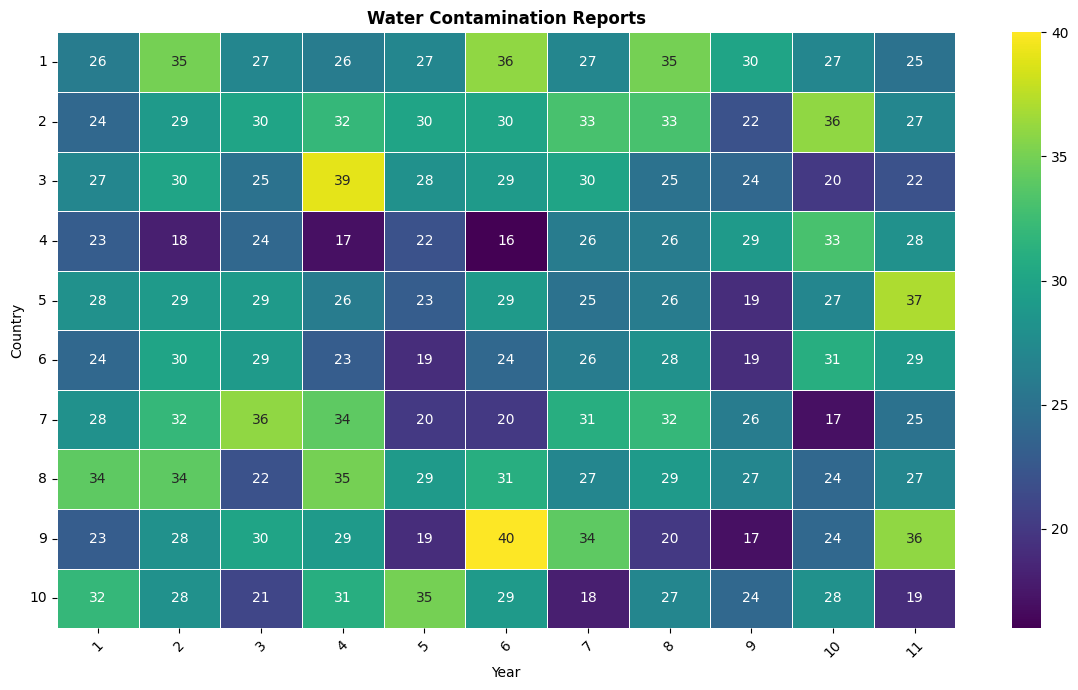

In [75]:
# Group by country and year, then count
df['country'] = df['country'].rank(method='dense').astype(int)
df['year'] = df['year'].rank(method='dense').astype(int)
counts = df.groupby(['country', 'year']).size().unstack(fill_value=0)

# Create the heatmap
fig, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(counts, annot=True, fmt='d', cmap='viridis', linewidths=0.5, ax=ax)

# Style the plot
ax.set_title('Water Contamination Reports', weight='bold')
ax.set_xlabel('Year')
ax.set_ylabel('Country')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


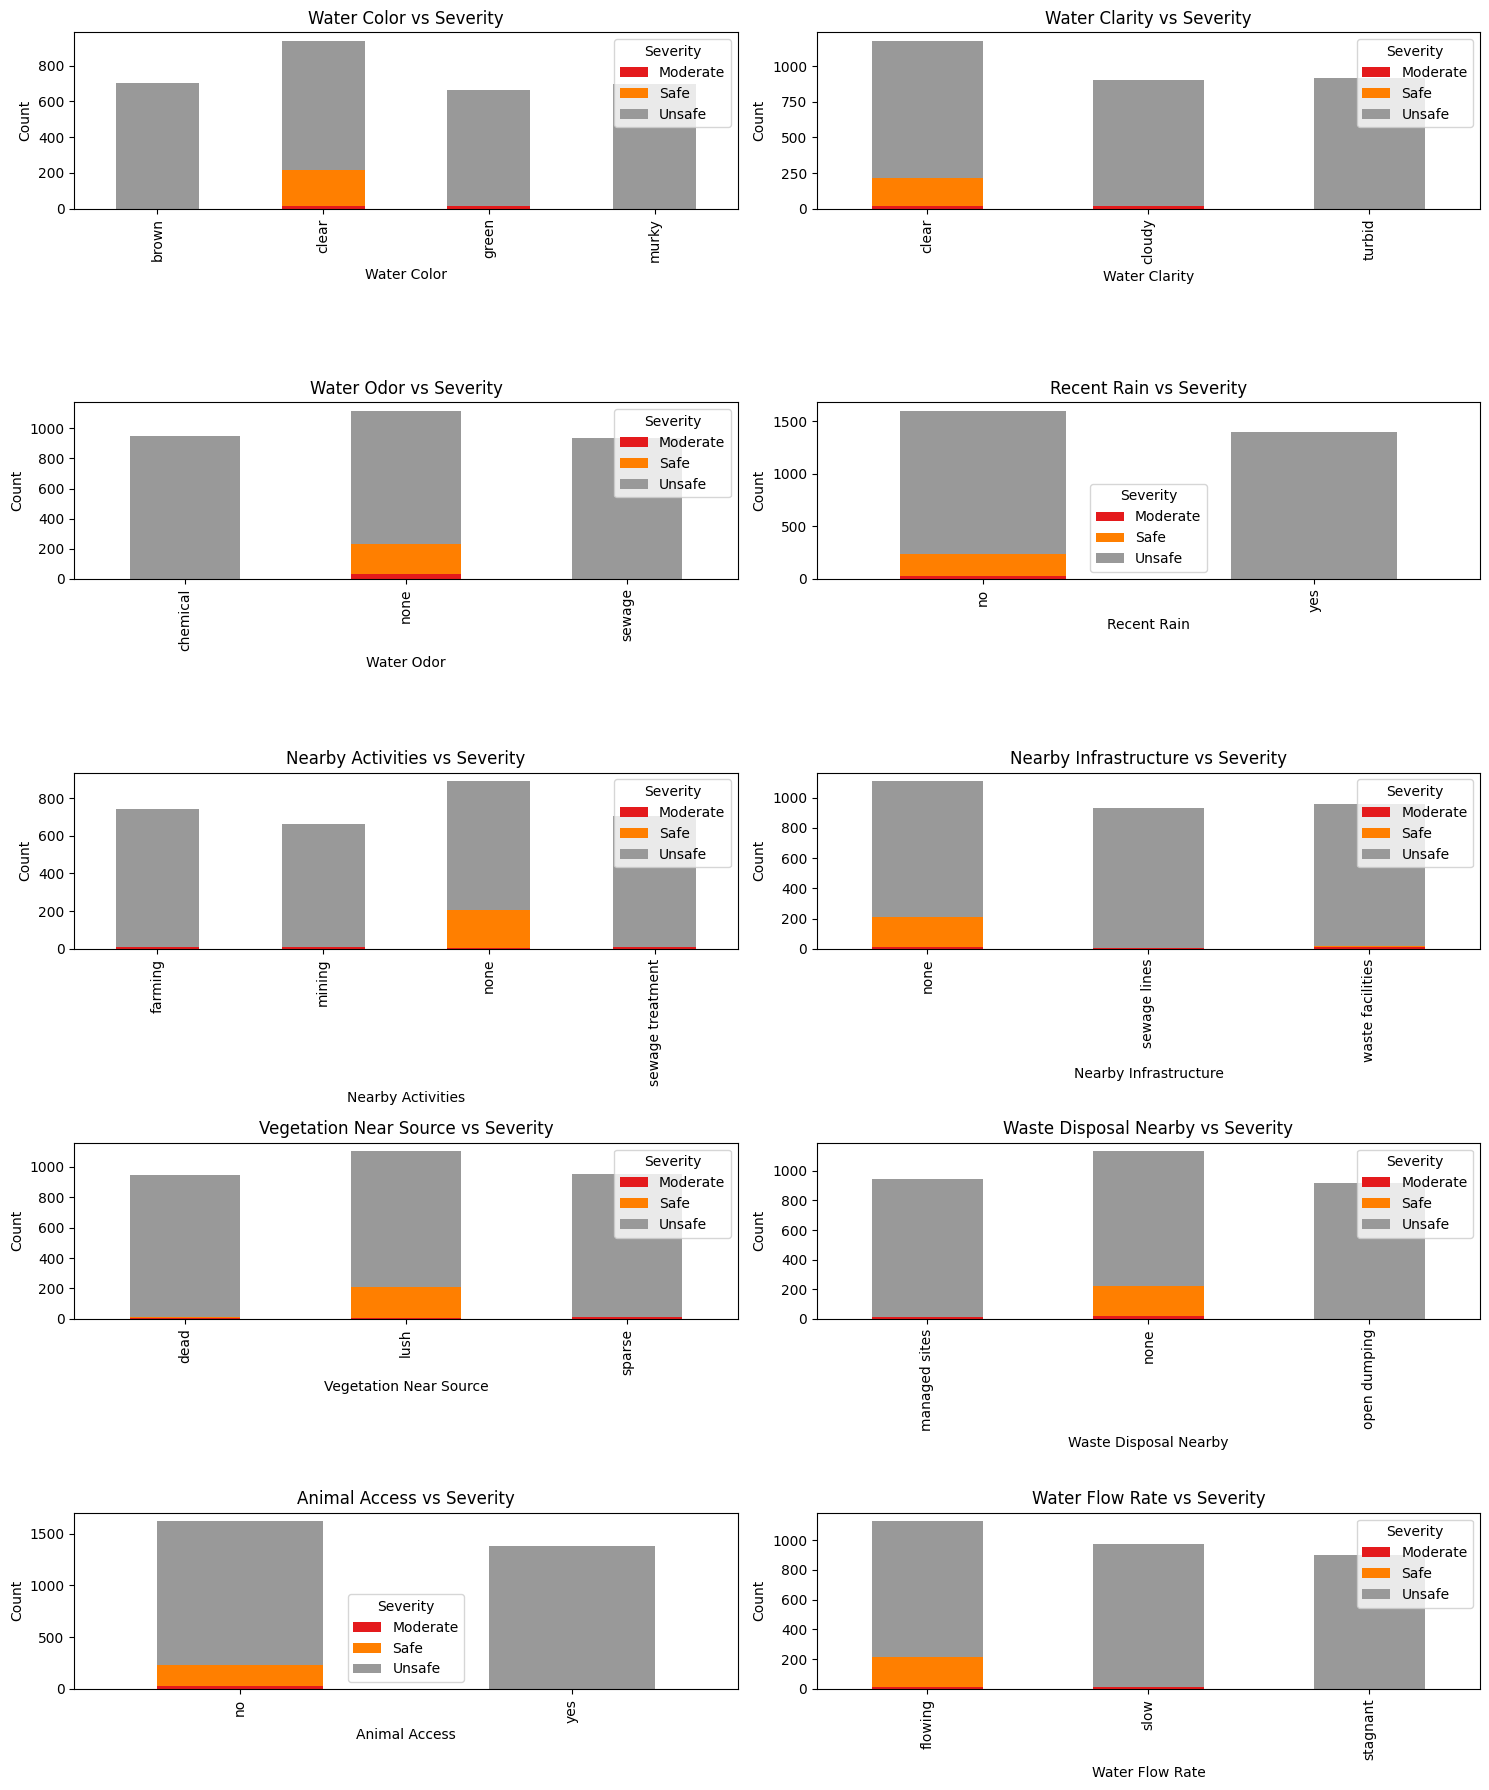

In [76]:
# Select categorical water quality features
features_to_plot = [
    'water_color', 'water_clarity', 'water_odor', 'recent_rain',
    'nearby_activities', 'nearby_infrastructure', 'vegetation_near_source',
    'waste_disposal_nearby', 'animal_access', 'water_flow_rate'
]

# Set up subplot grid
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 18))
axes = axes.flatten()

# Plot count plots for each feature colored by severity
for i, feature in enumerate(features_to_plot):
    # Group by feature and severity, count occurrences
    df_grouped = df.groupby([feature, 'severity']).size().unstack(fill_value=0)

    # Plot stacked bar chart
    df_grouped.plot(kind='bar', stacked=True, ax=axes[i], colormap='Set1')
    axes[i].set_title(f'{feature.replace("_", " ").title()} vs Severity')
    axes[i].set_xlabel(feature.replace("_", " ").title())
    axes[i].set_ylabel("Count")
    axes[i].legend(title='Severity')

# Adjust layout
plt.tight_layout()


In [77]:
source_df = pd.crosstab(df['organization'], df['source_type'])
source_df

source_type        Academic Paper  Field Survey  Gov Report  NGO Report
organization                                                           
Red Cross                     160           153         140         140
Save the Children             150           167         128         146
UNICEF                        150           164         148         136
WHO                           140           131         151         167
Water.org                     154           169         159         147

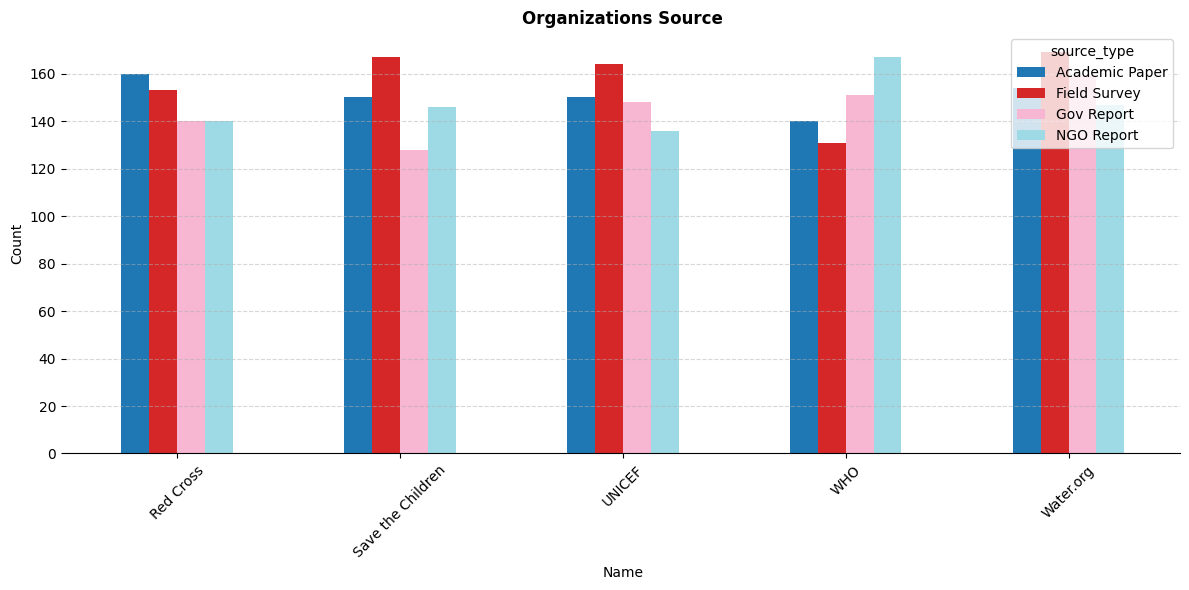

In [78]:
fig, ax = plt.subplots(figsize=(12, 6))
source_df.plot.bar(stacked=False, ax=ax, colormap='tab20')

ax.set_title('Organizations Source', weight='bold')
ax.set_xlabel('Name')
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Hide spines
for spine in ['top', 'right', 'left']:
    ax.spines[spine].set_visible(False)

plt.tight_layout()
plt.show()

In [79]:
df.describe()

country  geo_location         year  severity_score     latitude  \
count  3000.000000   3000.000000  3000.000000     3000.000000  3000.000000   
mean      5.459667     -0.062769     5.940333        1.855333    12.194209   
std       2.907437     51.554133     3.160712        0.508420    10.317221   
min       1.000000    -89.945994     1.000000        0.000000    -2.981434   
25%       3.000000    -44.162393     3.000000        2.000000     1.533355   
50%       5.000000     -0.540442     6.000000        2.000000     9.600036   
75%       8.000000     44.268546     9.000000        2.000000    22.351115   
max      10.000000     89.822411    11.000000        2.000000    28.378046   

         longitude  
count  3000.000000  
mean     38.532865  
std      43.200441  
min     -72.357097  
25%      23.822264  
50%      38.652120  
75%      78.667743  
max      90.293441

## **Data Cleaning and Preprocessing**
Handle Missing Values: Drop or fill missing values using mean, mode, or a placeholder (e.g., "Unknown").

Encode Categorical Features: Use Label Encoding or One-Hot Encoding to convert categories to numbers.

Feature Engineering: Create or combine features that may help the model (e.g., weather + activity).

Scaling: Normalize numeric values using StandardScaler or MinMaxScaler.

Text Preprocessing: Clean, tokenize, remove stopwords, and lemmatize if working with text.

Split Data: Divide into training, validation, and test sets (e.g., 70/15/15).

In [80]:
print(df.shape)

(3000, 32)


In [81]:
# Finding any NaN values
df.isna().any()

entry_id                  False
country                   False
source_title              False
excerpt                   False
geo_location              False
water_source              False
sanitation_type           False
sector                    False
gender                    False
age_group                 False
income_level              False
infrastructure_type       False
population_density        False
climate_zone              False
year                      False
organization              False
source_type               False
special_needs_group       False
severity                  False
water_color               False
water_clarity             False
water_odor                False
recent_rain               False
nearby_activities         False
nearby_infrastructure     False
vegetation_near_source    False
waste_disposal_nearby     False
animal_access             False
water_flow_rate           False
severity_score            False
latitude                  False
longitud

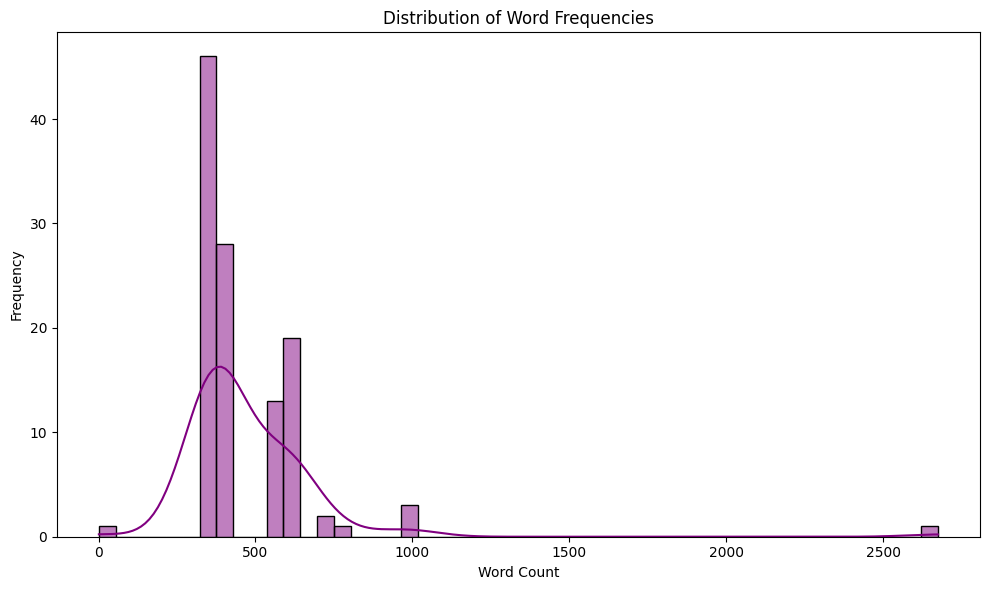

In [82]:
from sklearn.feature_extraction.text import CountVectorizer
# Extract text data
text_data = df['excerpt'].dropna().astype(str)

# Convert to word frequencies
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(text_data)

# Word frequencies
word_freq = X.toarray().sum(axis=0)
words = vectorizer.get_feature_names_out()
freq_df = pd.DataFrame({'word': words, 'count': word_freq})

# Sort values
freq_df_sorted = freq_df.sort_values(by='count', ascending=False)

# plot
plt.figure(figsize=(10, 6))
sns.histplot(data=freq_df_sorted, x='count', bins=50, kde=True, color='purple')
plt.title('Distribution of Word Frequencies')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

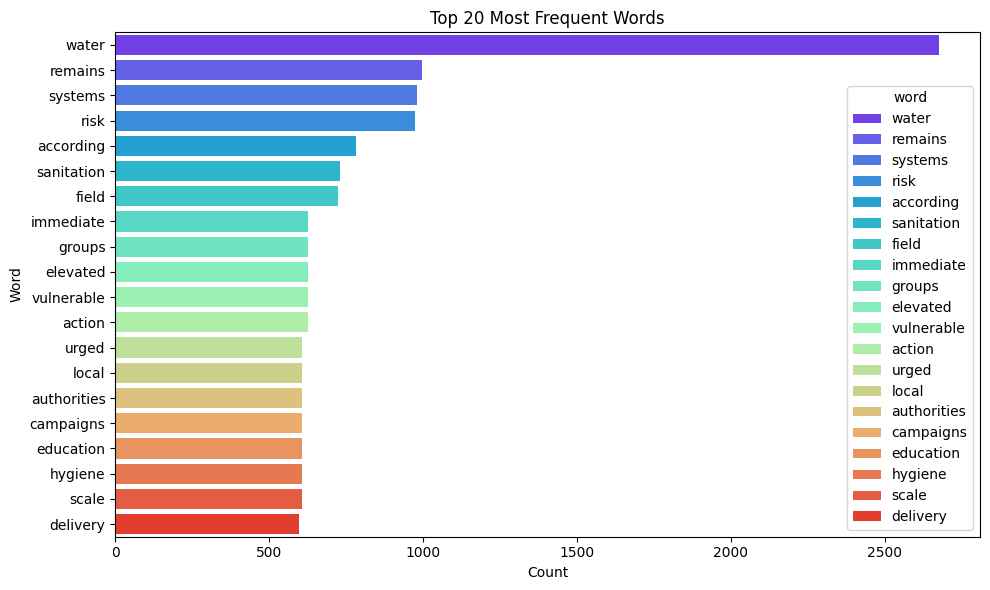

In [83]:
# Sort and plot top Number of texts
top_n = 20

top_words = freq_df.sort_values(by='count', ascending=False).head(top_n)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='count', 
    y='word', 
    data=top_words, 
    palette='rainbow', 
    hue='word', 
    legend=True 
)
plt.title(f'Top {top_n} Most Frequent Words')
plt.xlabel('Count')
plt.ylabel('Word')
plt.tight_layout()
plt.show()

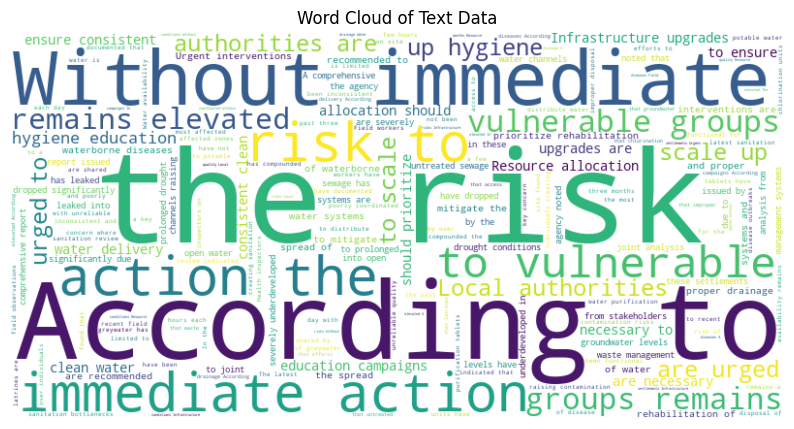

In [84]:
from wordcloud import WordCloud

text = ' '.join(text_data.dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords='english').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Text Data')
plt.show()

In [85]:
df_copy = df.copy()

In [86]:
df_copy.reset_index(inplace=True)

In [87]:
# Get all object (categorical) columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()

if 'excerpt' in categorical_cols:
    categorical_cols.remove('excerpt')


In [88]:
# Encoding Categorical Variables
from sklearn.preprocessing import LabelEncoder

# Columns to exclude from label encoding for separate NLP pipeline
text_columns_to_exclude = [
    'excerpt', 'source_title', 'geo_location',
    'nearby_activities', 'organization',
    'vegetation_near_source', 'waste_disposal_nearby'
]

# Select categorical columns and exclude NLP-relevant ones
categorical_cols = df.select_dtypes(include='object').drop(
    columns=text_columns_to_exclude, errors='ignore'
).columns

# Initialize label encoder
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))


In [89]:
# Text Preprocessing for 'excerpt'
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

df['excerpt_clean'] = df['excerpt'].astype(str).apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [90]:
from nltk.tokenize import RegexpTokenizer
nltk.download('punkt', download_dir='nltk_data')
nltk.data.path.append('nltk_data')


tokenizer = RegexpTokenizer(r'\w+')
df['excerpt_tokens'] = df['excerpt'].astype(str).apply(lambda x: tokenizer.tokenize(x.lower()))
df[['excerpt', 'excerpt_tokens']].head()


[nltk_data] Downloading package punkt to nltk_data...
[nltk_data]   Package punkt is already up-to-date!


excerpt  \
0  Health inspectors on site found that improper ...   
1  The latest sanitation review indicated that im...   
2  According to recent field observations, waste ...   
3  The latest sanitation review indicated that ef...   
4  A comprehensive report issued by the agency no...   

                                      excerpt_tokens  
0  [health, inspectors, on, site, found, that, im...  
1  [the, latest, sanitation, review, indicated, t...  
2  [according, to, recent, field, observations, w...  
3  [the, latest, sanitation, review, indicated, t...  
4  [a, comprehensive, report, issued, by, the, ag...

In [91]:
stop_words = set(stopwords.words('english'))
df['excerpt_tokens'] = df['excerpt_tokens'].apply(lambda tokens: [word for word in tokens if word.lower() not in stop_words])
df[['excerpt', 'excerpt_tokens']].head(10)


excerpt  \
0  Health inspectors on site found that improper ...   
1  The latest sanitation review indicated that im...   
2  According to recent field observations, waste ...   
3  The latest sanitation review indicated that ef...   
4  A comprehensive report issued by the agency no...   
5  The latest sanitation review indicated that un...   
6  Water availability remains a key concern where...   
7  According to recent field observations, access...   
8  According to joint analysis from stakeholders,...   
9  Field workers have documented that access to p...   

                                      excerpt_tokens  
0  [health, inspectors, site, found, improper, di...  
1  [latest, sanitation, review, indicated, improp...  
2  [according, recent, field, observations, waste...  
3  [latest, sanitation, review, indicated, effort...  
4  [comprehensive, report, issued, agency, noted,...  
5  [latest, sanitation, review, indicated, untrea...  
6  [water, availability, remains, key, concern, w...  
7  [according, recent, field, observations, acces...  
8  [according, joint, analysis, stakeholders, acc...  
9  [field, workers, documented, access, potable, ...

### **Feature Engineering**

In [92]:
# Feature Scaling for numerical data
from sklearn.preprocessing import StandardScaler

# Select numeric columns
num_cols = df.select_dtypes(include='number').columns

# Drop columns with all NaNs or constant values (zero variance)
valid_num_cols = [col for col in num_cols 
                  if df[col].nunique(dropna=True) > 1 and df[col].notna().sum() > 0]

# Scale only valid numeric columns
scaler = StandardScaler()
df[valid_num_cols] = scaler.fit_transform(df[valid_num_cols])


In [93]:
# Population Density Log Transform handles skewness
df['population_density'] = df['population_density'].clip(lower=0)
df['population_log'] = np.log1p(df['population_density'])

# simple binary feature
df['has_rain'] = df['recent_rain'].map({'Yes': 1, 'No': 0})
df['waste_nearby'] = df['waste_disposal_nearby'].map({'Yes': 1, 'No': 0, 'Unknown': 0})

# Interactional feature Animal access and water clarity combines the risk indicator
df['animal_clarity_interact'] = df['animal_access'] * df['water_clarity']

# Year as age of the record if static data
df['record_age'] = 2025 - df['year']

# Climate-based risk factor
df['climate_zone_encoded'] = le.fit_transform(df['climate_zone'].astype(str))


In [94]:
# Count encoding of common categorical values and Keep only columns that don't contain lists
hashable_columns = [col for col in df.columns if df[col].map(type).ne(list).all()]

# Drop duplicates only based on those columns
df = df.drop_duplicates(subset=hashable_columns)

In [95]:
# Train-Test Split
from sklearn.model_selection import train_test_split

X = df.drop('severity', axis=1)
y = df['severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **Feature Selection and Text Feature Integration**
After cleaning and encoding the data, the next step is to improve model performance by selecting the most relevant features. Feature selection reduces overfitting, speeds up training, and often boosts accuracy.

**Feature Selection**

Remove low-variance features: They provide little information to the model.

Check feature correlation: Drop one of two highly correlated features (e.g., using df.corr() or heatmaps).

Use model-based importance: Models like Random Forest or XGBoost can reveal which features contribute most.

Use statistical tests: For classification, try chi2, ANOVA, or mutual information.

**Integrating Text Features**

If your dataset includes text columns:

Separate processing is recommended: Apply NLP (TF-IDF, embeddings, etc.) to text features.

Combine text-derived features with structured features using concatenation or feature union.

Ensure all numerical/categorical features are scaled or encoded before combining with text.

In [96]:
# Select structured features (exclude 'excerpt_clean' or other text features)
structured_columns = [
    'country', 'geo_location', 'water_source', 'sanitation_type', 'sector', 
    'gender', 'age_group', 'income_level', 'infrastructure_type', 
    'population_density', 'climate_zone', 'year', 'organization', 
    'source_type', 'special_needs_group', 'water_color', 'water_clarity', 
    'water_odor', 'recent_rain', 'nearby_activities', 'nearby_infrastructure', 
    'vegetation_near_source', 'waste_disposal_nearby', 'animal_access', 
    'water_flow_rate'
]

# Create structured feature DataFrame
X_structured = df[structured_columns].copy()


In [97]:
X_structured.info()
X_structured.isnull().sum().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 3000 non-null   float64
 1   geo_location            3000 non-null   float64
 2   water_source            3000 non-null   float64
 3   sanitation_type         3000 non-null   float64
 4   sector                  3000 non-null   float64
 5   gender                  3000 non-null   float64
 6   age_group               3000 non-null   float64
 7   income_level            3000 non-null   float64
 8   infrastructure_type     3000 non-null   float64
 9   population_density      3000 non-null   float64
 10  climate_zone            3000 non-null   float64
 11  year                    3000 non-null   float64
 12  organization            3000 non-null   object 
 13  source_type             3000 non-null   float64
 14  special_needs_group     3000 non-null   

np.int64(0)

In [98]:
from sklearn.preprocessing import LabelEncoder

# Encode the object columns
obj_cols = ['organization', 'nearby_activities', 'vegetation_near_source', 'waste_disposal_nearby']
le = LabelEncoder()

for col in obj_cols:
    X_structured[col] = le.fit_transform(X_structured[col])


In [99]:
X_structured.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 3000 non-null   float64
 1   geo_location            3000 non-null   float64
 2   water_source            3000 non-null   float64
 3   sanitation_type         3000 non-null   float64
 4   sector                  3000 non-null   float64
 5   gender                  3000 non-null   float64
 6   age_group               3000 non-null   float64
 7   income_level            3000 non-null   float64
 8   infrastructure_type     3000 non-null   float64
 9   population_density      3000 non-null   float64
 10  climate_zone            3000 non-null   float64
 11  year                    3000 non-null   float64
 12  organization            3000 non-null   int64  
 13  source_type             3000 non-null   float64
 14  special_needs_group     3000 non-null   

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit and transform the text column
X_text = tfidf.fit_transform(df['excerpt_clean'])

# Convert to DataFrame and reset index
import pandas as pd

X_text_df = pd.DataFrame(X_text.toarray(), columns=tfidf.get_feature_names_out(), index=df.index)

In [101]:
# Combine both feature sets

X_all = pd.concat([X_structured, X_text_df], axis=1)

# Define target
y = df['severity']


In [102]:
# Final Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=42)

###  **Feature Selection**

To reduce dimensionality and improve model efficiency, we performed feature selection using two methods:

- **Univariate Selection** (`SelectKBest` with Chi-Square) to retain top-scoring features.
- **Model-Based Selection** (`SelectFromModel`) using feature importances from a Random Forest classifier.

This step ensures that only the most informative features are used for modeling.


In [103]:
from sklearn.feature_selection import mutual_info_regression

# Get numeric features only
X_num = X_train.select_dtypes(include=['int64', 'float64'])

# Compute mutual information scores
mi_scores = mutual_info_regression(X_num, y_train)

# Create a DataFrame for easier sorting
mi_df = pd.DataFrame({'Feature': X_num.columns, 'MI_Score': mi_scores})
mi_df = mi_df.sort_values(by='MI_Score', ascending=False)

# Select features with above-median score
threshold = mi_df['MI_Score'].median()
selected_features_mi = mi_df[mi_df['MI_Score'] >= threshold]['Feature'].tolist()

print("Selected Features from Mutual Info:")
print(selected_features_mi)

Selected Features from Mutual Info:
['water_flow_rate', 'water_color', 'water_clarity', 'nearby_activities', 'nearby_infrastructure', 'recent_rain', 'water_odor', 'waste_disposal_nearby', 'vegetation_near_source', 'animal_access', 'risks', 'underdeveloped', 'contamination', 'groups', 'source_type', 'limited', 'zones', 'water_source', 'comprehensive', 'hours', 'country', 'resource', 'remains', 'analysis', 'urgent', 'health', 'gender', 'consistent', 'chlorination', 'drought', 'issued', 'special_needs_group', 'observations', 'waterborne', 'elevated', 'proper', 'dropped', 'waste', 'purification', 'leaked', 'open', 'rehabilitation', 'significantly', 'raising', 'income_level', 'coordinated', 'past', 'tablets', 'shared', 'latest', 'clean', 'population_density', 'access', 'management', 'campaigns', 'outbreaks', 'scale', 'upgrades', 'documented', 'vulnerable', 'age_group', 'recent', 'climate_zone', 'spread', 'urged', 'local', 'hygiene', 'affected', 'geo_location']


In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

y_train_int = y_train.astype(int)

# Fit model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train_int)

# Select from model
sfm = SelectFromModel(rf, threshold='median', prefit=True)
selected_features_sfm = X_train.columns[sfm.get_support()].tolist()

print("Selected Features from Random Forest:")
print(selected_features_sfm)


Selected Features from Random Forest:
['country', 'geo_location', 'water_source', 'sanitation_type', 'sector', 'gender', 'age_group', 'income_level', 'infrastructure_type', 'population_density', 'climate_zone', 'year', 'organization', 'source_type', 'special_needs_group', 'water_color', 'water_clarity', 'water_odor', 'recent_rain', 'nearby_activities', 'nearby_infrastructure', 'vegetation_near_source', 'waste_disposal_nearby', 'animal_access', 'water_flow_rate', 'access', 'according', 'action', 'agency', 'allocation', 'analysis', 'authorities', 'bottlenecks', 'campaigns', 'day', 'disease', 'disposal', 'field', 'groups', 'hygiene', 'inspectors', 'interventions', 'joint', 'local', 'management', 'mitigate', 'potable', 'prolonged', 'proper', 'quality', 'recommended', 'remains', 'report', 'resource', 'risk', 'sanitation', 'scale', 'settlements', 'severely', 'site', 'stakeholders', 'systems', 'unreliable', 'urged', 'urgent', 'waste', 'water', 'waterborne', 'workers']


###  **Combining Feature Selection Methods**

To improve the robustness of feature selection, we combined two methods:

- **Mutual Information Regression**
- **Random Forest-based Selection**

We extracted features that were either:
- Selected by both methods (intersection), or
- Selected by at least one method (union).

This hybrid approach balances relevance and importance, ensuring we retain only the most informative features for modeling.


In [105]:
# Combine the results
mi_set = set(selected_features_mi)
rf_set = set(selected_features_sfm)

# Features selected by both
selected_features_joint = list(mi_set.intersection(rf_set))
print("Common selected features:")
print(selected_features_joint)

selected_features_union = list(mi_set.union(rf_set))


Common selected features:
['nearby_infrastructure', 'animal_access', 'scale', 'source_type', 'water_flow_rate', 'water_odor', 'waterborne', 'water_source', 'waste_disposal_nearby', 'analysis', 'water_clarity', 'hygiene', 'groups', 'country', 'access', 'population_density', 'recent_rain', 'climate_zone', 'campaigns', 'local', 'water_color', 'resource', 'nearby_activities', 'management', 'special_needs_group', 'remains', 'vegetation_near_source', 'gender', 'income_level', 'geo_location', 'proper', 'urged', 'urgent', 'waste', 'age_group']


## **Modelling**

We now move into building and evaluating classification models to predict the severity of access to clean water.

**Objective:**
Use selected structured and text features to predict the `target` class indicating the severity of access to clean water.

**Models Selected:**
- Logistic Regression (baseline)
- Random Forest
- XGBoost

Each model will be trained using a `Pipeline` that includes preprocessing with `ColumnTransformer`, followed by training and evaluation.

**Evaluation Metrics:**
- Accuracy
- Classification Report (Precision, Recall, F1-Score)
- Confusion Matrix
